<a href="https://colab.research.google.com/github/zavass/Actividad_03/blob/master/Clasificador_Cucharas_Tenedores_Cuchillos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Crear las carpetas para subir las imagenes
!mkdir cuchillos
!mkdir cucharas
!mkdir tenedores

In [ ]:
# Entrar en cada carpeta y descomprimir el archivo zip
%cd cuchillos
!unzip cuchillos.zip
%cd ..

%cd tenedores
!unzip tenedores.zip
%cd ..

%cd cucharas
!unzip cucharas.zip
%cd ..

/content/cuchillos
Archive:  cuchillos.zip
   creating: cuchillos/
  inflating: cuchillos/-galucho-hueso-alpaca-sku-gal-hain-20-1-cf211d24-8f79-4ccd-947c-ac26f08210db.jpg  
  inflating: cuchillos/001-300x300.jpg  
  inflating: cuchillos/002308_4.jpg  
  inflating: cuchillos/1-11.jpg      
  inflating: cuchillos/104500.jpg    
  inflating: cuchillos/1155811303.jpg  
  inflating: cuchillos/1654046440162.png  
  inflating: cuchillos/18_fc60fc87-cc0e-4509-946e-03ed21d23c6a.png  
  inflating: cuchillos/23498917PDM001G.jpg  
  inflating: cuchillos/3C-UNIBLOCK-COLECCION_N.jpg  
  inflating: cuchillos/4Messer_28fcm29.png  
  inflating: cuchillos/5161-M.jpg    
  inflating: cuchillos/6cef923426a247c4b5b3568d97ddd21b.jpg  
  inflating: cuchillos/71qtrLV1zYL._AC_SL1500_.jpg  
  inflating: cuchillos/71ywHZiGYaL._UF8941000_QL80_.jpg  
  inflating: cuchillos/81DtItlIaIL._AC_SL1500_.jpg  
  inflating: cuchillos/81EN6WmLkZL._UF8941000_QL80_.jpg  
  inflating: cuchillos/840101506380-1-300x300.jpg  
  i

In [ ]:
#Borrar los archivo ZIP
!rm -rf /content/cucharas/cucharas.zip
!rm -rf /content/cuchillos/cuchillos.zip
!rm -rf /content/tenedores/tenedores.zip
# /content/cucharas/cucharas

In [ ]:
#Mostrar cuantas imagenes tengo de cada categoria
!ls /content/cucharas/cucharas | wc -l #475
!ls /content/cuchillos/cuchillos | wc -l #515
!ls /content/tenedores/tenedores | wc -l #419

726
738
622


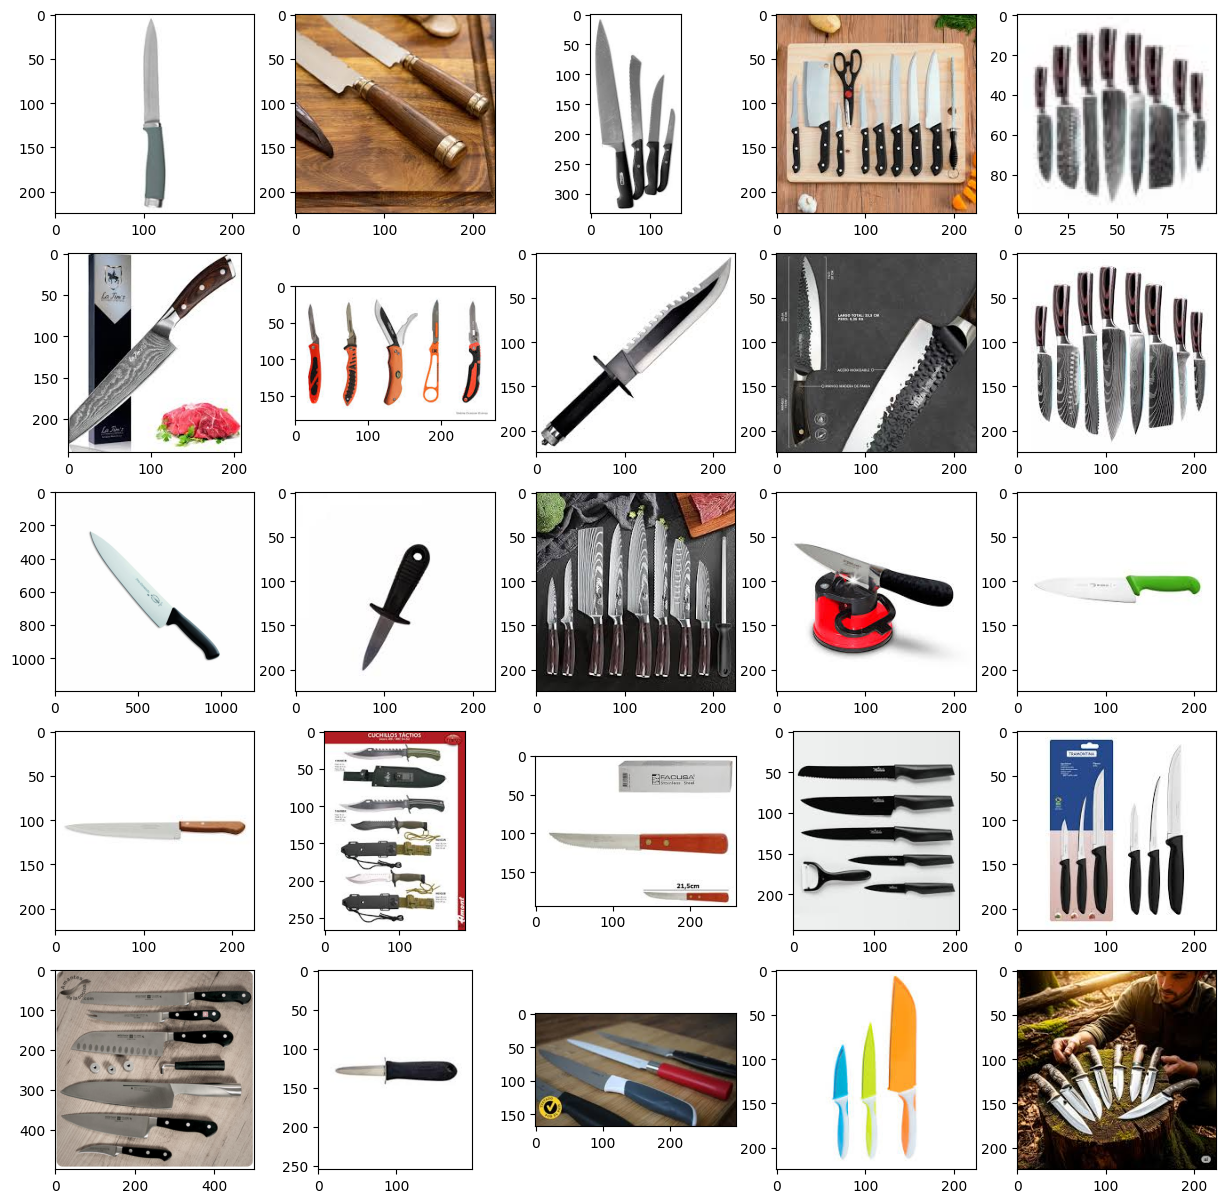

In [ ]:
#Mostrar algunas imagenes con pyplot
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(15,15))

carpeta = '/content/cuchillos/cuchillos'
imagenes = os.listdir(carpeta)

for i, nombreimg in enumerate(imagenes[:25]):
  plt.subplot(5,5,i+1)
  imagen = mpimg.imread(carpeta + '/' + nombreimg)
  plt.imshow(imagen)

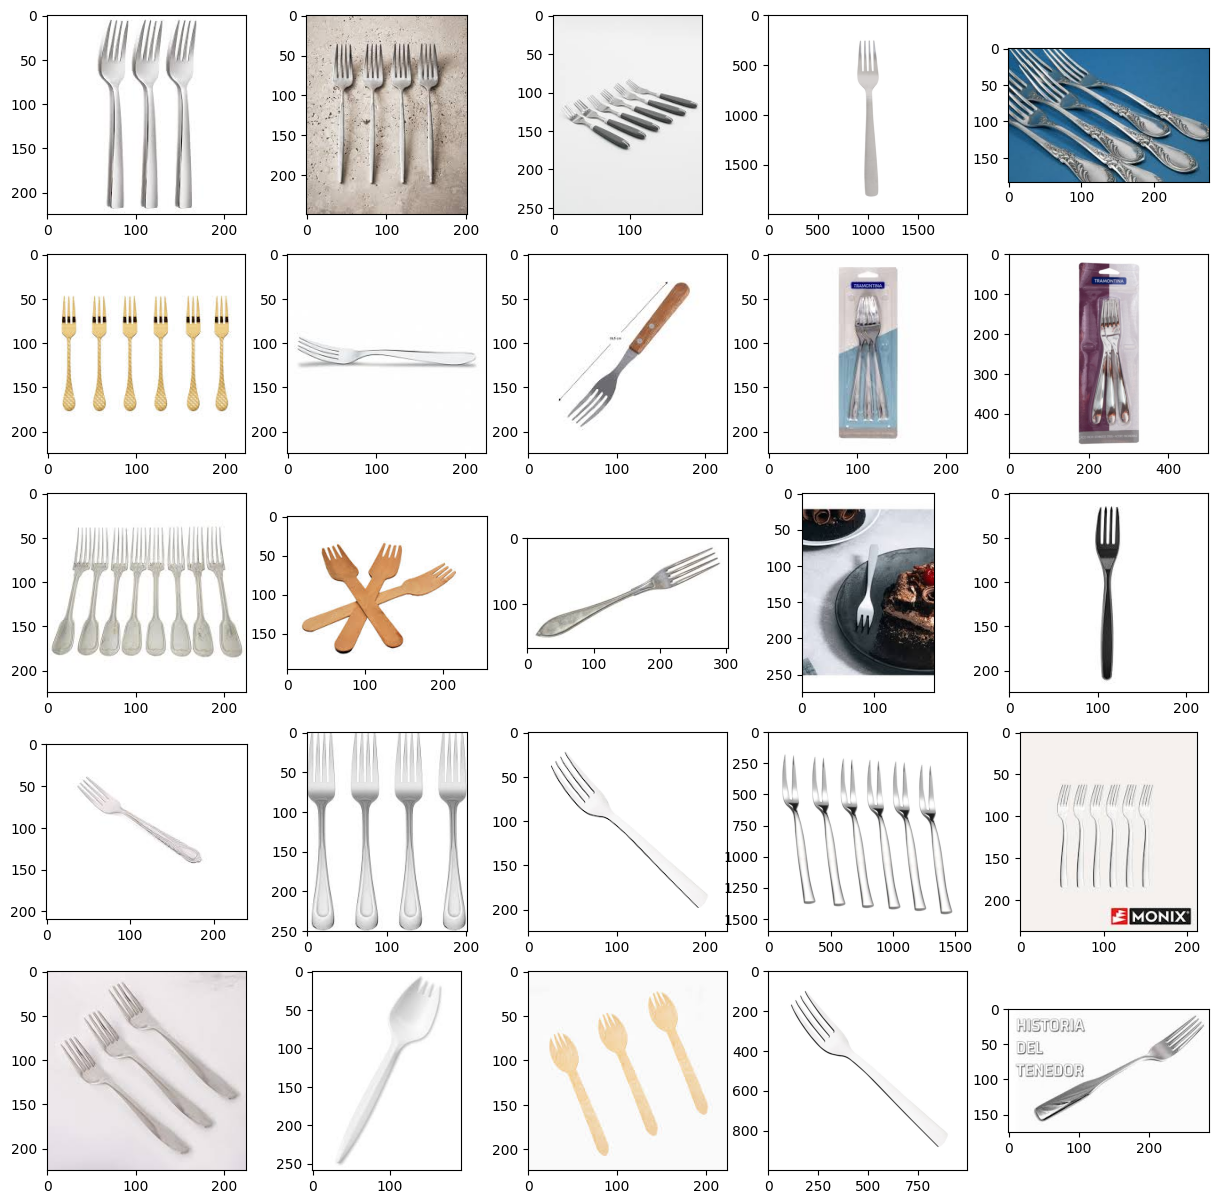

In [ ]:
plt.figure(figsize=(15,15))

carpeta = '/content/tenedores/tenedores'
imagenes = os.listdir(carpeta)

for i, nombreimg in enumerate(imagenes[:25]):
  plt.subplot(5,5,i+1)
  imagen = mpimg.imread(carpeta + '/' + nombreimg)
  plt.imshow(imagen)

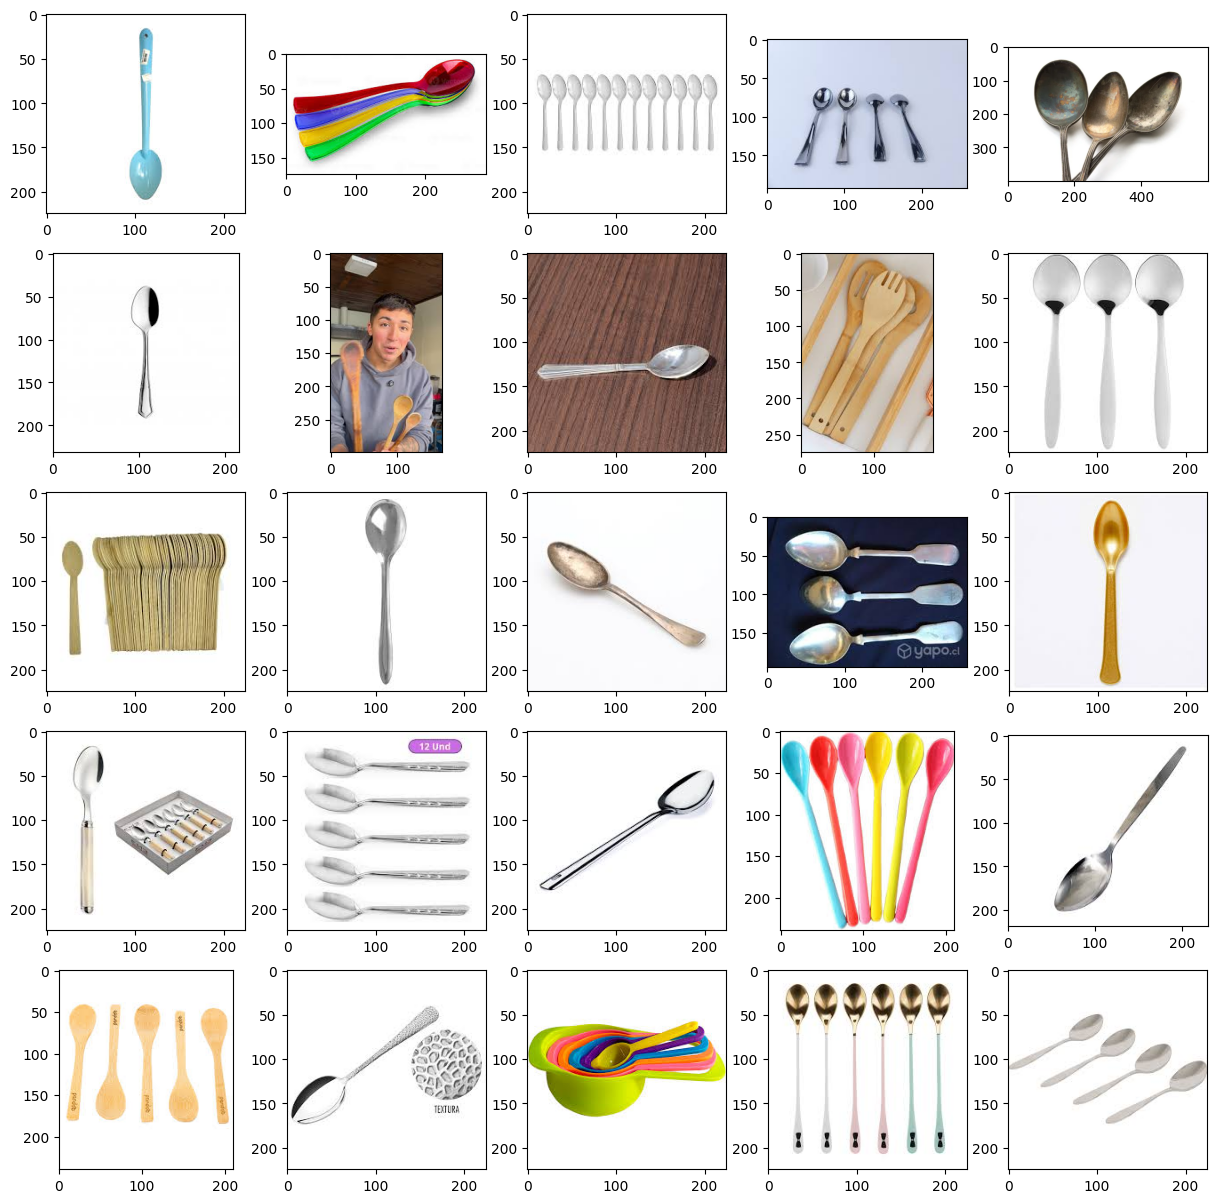

In [ ]:
plt.figure(figsize=(15,15))

carpeta = '/content/cucharas/cucharas'
imagenes = os.listdir(carpeta)

for i, nombreimg in enumerate(imagenes[:25]):
  plt.subplot(5,5,i+1)
  imagen = mpimg.imread(carpeta + '/' + nombreimg)
  plt.imshow(imagen)

In [ ]:
#Crear carpetas para hacer el set de datos

!mkdir dataset
!mkdir dataset/cuchillo
!mkdir dataset/tenedores
!mkdir dataset/cucharas

In [ ]:
#Copiar imagenes que subimos a carpetas del dataset
#Limitar para que todos tengan la misma cantidad de imagenes


import shutil
carpeta_fuente = '/content/cucharas/cucharas'
carpeta_destino = '/content/dataset/cucharas'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i < 600:
    #Copia de la carpeta fuente a la destino
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [ ]:
import shutil

carpeta_fuente = '/content/tenedores/tenedores'
carpeta_destino = '/content/dataset/tenedores'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i < 600:
    #Copia de la carpeta fuente a la destino
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [ ]:
carpeta_fuente = '/content/cuchillos/cuchillos'
carpeta_destino = '/content/dataset/cuchillo'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i < 600:
    #Copia de la carpeta fuente a la destino
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [ ]:
#Mostrar cuantas imagenes tengo de cada categoria en el dataset
!ls /content/dataset/cucharas | wc -l
!ls /content/dataset/cuchillo | wc -l
!ls /content/dataset/tenedores | wc -l

600
600
600


Found 1440 images belonging to 3 classes.
Found 360 images belonging to 3 classes.


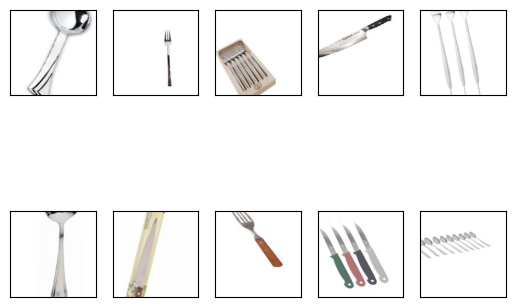

In [ ]:
#Aumento de datos con ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

#Crear el dataset generador
datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range = 30,
    width_shift_range = 0.25,
    height_shift_range = 0.25,
    shear_range = 15,
    zoom_range = [0.5, 1.5],
    validation_split=0.2 #20% para pruebas
)

#Generadores para sets de entrenamiento y pruebas
data_gen_entrenamiento = datagen.flow_from_directory('/content/dataset', target_size=(224,224),
                                                     batch_size=32, shuffle=True, subset='training')
data_gen_pruebas = datagen.flow_from_directory('/content/dataset', target_size=(224,224),
                                                     batch_size=32, shuffle=True, subset='validation')

#Imprimir 10 imagenes del generador de entrenamiento
for imagen, etiqueta in data_gen_entrenamiento:
  for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(imagen[i])
  break
plt.show()


In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

# URL del modelo
URL = "https://tfhub.dev/google/tf2/imagenet/mobilenet_v2_100_224/feature_vector/5"

# Definir entrada
inputs = tf.keras.Input(shape=(224, 224, 3))

# 🔹 Integrar la capa de TF Hub directamente en el flujo funcional
x = hub.KerasLayer(URL, input_shape=(224, 224, 3), trainable=False)(inputs)

# Capa de regularización
x = tf.keras.layers.Dropout(0.3)(x)

# Capa de salida para 3 clases
outputs = tf.keras.layers.Dense(3, activation="softmax")(x)

# Construir modelo
model = tf.keras.Model(inputs=inputs, outputs=outputs)

# Compilar
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

model.summary()


OSError: https://tfhub.dev/google/tf2/imagenet/mobilenet_v2_100_224/feature_vector/5 does not appear to be a valid module.

In [ ]:
#Congelar el modelo descargado
mobilenetv2.trainable = False

In [ ]:
modelo = tf.keras.Sequential([
    mobilenetv2,
    tf.keras.layers.Dense(3, activation='softmax')
])

ValueError: Only instances of `keras.Layer` can be added to a Sequential model. Received: <tensorflow_hub.keras_layer.KerasLayer object at 0x7b23330b1710> (of type <class 'tensorflow_hub.keras_layer.KerasLayer'>)

In [ ]:
modelo.summary()

In [ ]:
#Compilar como siempre
modelo.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
#Entrenar el modelo
EPOCAS = 50

historial = modelo.fit(
    data_gen_entrenamiento, epochs=EPOCAS, batch_size=32,
    validation_data=data_gen_pruebas
)

In [ ]:
#Graficas de precisión
acc = historial.history['accuracy']
val_acc = historial.history['val_accuracy']

loss = historial.history['loss']
val_loss = historial.history['val_loss']

rango_epocas = range(50)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(rango_epocas, acc, label='Precisión Entrenamiento')
plt.plot(rango_epocas, val_acc, label='Precisión Pruebas')
plt.legend(loc='lower right')
plt.title('Precisión de entrenamiento y pruebas')

plt.subplot(1,2,2)
plt.plot(rango_epocas, loss, label='Pérdida de entrenamiento')
plt.plot(rango_epocas, val_loss, label='Pérdida de pruebas')
plt.legend(loc='upper right')
plt.title('Pérdida de entrenamiento y pruebas')
plt.show()

In [ ]:
#Categorizar una imagen de internet
from PIL import Image
import requests
from io import BytesIO
import cv2

def categorizar(url):
  respuesta = requests.get(url)
  img = Image.open(BytesIO(respuesta.content))
  img = np.array(img).astype(float)/255

  img = cv2.resize(img, (224,224))
  prediccion = modelo.predict(img.reshape(-1, 224, 224, 3))
  return np.argmax(prediccion[0], axis=-1)


In [ ]:
#0 = cuchara, 1 = cuchillo, 2 = tenedor
url = 'https://th.bing.com/th/id/R.e44940120b7b67680af246c3b3e936f2?rik=XZPLfxf4nHlzyw&pid=ImgRaw&r=0' #debe ser 2
prediccion = categorizar (url)
print(prediccion)

In [ ]:
#Crear la carpeta para exportarla a TF Serving
!mkdir -p carpeta_salida/modelo_cocina/1

In [ ]:
#Guardar el modelo en formato SavedModel
modelo.save('carpeta_salida/modelo_cocina/1')